## Market Segmentation for Airlines

Market segmentation is a strategy that divides a broad target market of customers into smaller, more similar groups, and then designs a marketing strategy specifically for each group. Clustering is a common technique for market segmentation since it automatically finds similar groups given a data set. 

In this problem, we'll see how clustering can be used to find similar groups of customers who belong to an airline's frequent flyer program. The airline is trying to learn more about its customers so that it can target different customer segments with different types of mileage offers. 

The file AirlinesCluster.csv contains information on 3,999 members of the frequent flyer program. This data comes from the textbook "Data Mining for Business Intelligence," by Galit Shmueli, Nitin R. Patel, and Peter C. Bruce. For more information, see the [website for the book](https://www.safaribooksonline.com/library/view/data-mining-for/9780470526828/).

There are seven different variables in the dataset, described below:

- Balance = number of miles eligible for award travel
- QualMiles = number of miles qualifying for TopFlight status
- BonusMiles = number of miles earned from non-flight bonus transactions in the past 12 months
- BonusTrans = number of non-flight bonus transactions in the past 12 months
- FlightMiles = number of flight miles in the past 12 months
- FlightTrans = number of flight transactions in the past 12 months
- DaysSinceEnroll = number of days since enrolled in the frequent flyer program

### Normalizing the Data

In [1]:
airlines = read.csv('./dataset/AirlinesCluster.csv')
summary(airlines)

    Balance          QualMiles         BonusMiles       BonusTrans  
 Min.   :      0   Min.   :    0.0   Min.   :     0   Min.   : 0.0  
 1st Qu.:  18528   1st Qu.:    0.0   1st Qu.:  1250   1st Qu.: 3.0  
 Median :  43097   Median :    0.0   Median :  7171   Median :12.0  
 Mean   :  73601   Mean   :  144.1   Mean   : 17145   Mean   :11.6  
 3rd Qu.:  92404   3rd Qu.:    0.0   3rd Qu.: 23801   3rd Qu.:17.0  
 Max.   :1704838   Max.   :11148.0   Max.   :263685   Max.   :86.0  
  FlightMiles       FlightTrans     DaysSinceEnroll
 Min.   :    0.0   Min.   : 0.000   Min.   :   2   
 1st Qu.:    0.0   1st Qu.: 0.000   1st Qu.:2330   
 Median :    0.0   Median : 0.000   Median :4096   
 Mean   :  460.1   Mean   : 1.374   Mean   :4119   
 3rd Qu.:  311.0   3rd Qu.: 1.000   3rd Qu.:5790   
 Max.   :30817.0   Max.   :53.000   Max.   :8296   

Let's go ahead and normalize our data. You can normalize the variables in a data frame by using the preProcess function in the "caret" package. You should already have this package installed from Week 4, but if not, go ahead and install it with install.packages("caret"). Then load the package with library(caret).

Now, create a normalized data frame called "airlinesNorm" by running the following commands:
```R
preproc = preProcess(airlines)

airlinesNorm = predict(preproc, airlines)
```
The first command pre-processes the data, and the second command performs the normalization. If you look at the summary of airlinesNorm, you should see that all of the variables now have mean zero. You can also see that each of the variables has standard deviation 1 by using the sd() function.

In [2]:
library("caret")

Loading required package: lattice

Loading required package: ggplot2



In [3]:
preproc = preProcess(airlines)
airlinesNorm = predict(preproc, airlines)

In [4]:
summary(airlinesNorm)

    Balance          QualMiles         BonusMiles        BonusTrans      
 Min.   :-0.7303   Min.   :-0.1863   Min.   :-0.7099   Min.   :-1.20805  
 1st Qu.:-0.5465   1st Qu.:-0.1863   1st Qu.:-0.6581   1st Qu.:-0.89568  
 Median :-0.3027   Median :-0.1863   Median :-0.4130   Median : 0.04145  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.1866   3rd Qu.:-0.1863   3rd Qu.: 0.2756   3rd Qu.: 0.56208  
 Max.   :16.1868   Max.   :14.2231   Max.   :10.2083   Max.   : 7.74673  
  FlightMiles       FlightTrans       DaysSinceEnroll   
 Min.   :-0.3286   Min.   :-0.36212   Min.   :-1.99336  
 1st Qu.:-0.3286   1st Qu.:-0.36212   1st Qu.:-0.86607  
 Median :-0.3286   Median :-0.36212   Median :-0.01092  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.:-0.1065   3rd Qu.:-0.09849   3rd Qu.: 0.80960  
 Max.   :21.6803   Max.   :13.61035   Max.   : 2.02284  

### Hierarchical Clustering

Compute the distances between data points (using euclidean distance) and then run the Hierarchical clustering algorithm (using method="ward.D") on the normalized data. It may take a few minutes for the commands to finish since the dataset has a large number of observations for hierarchical clustering.

Then, plot the dendrogram of the hierarchical clustering process. Suppose the airline is looking for somewhere between 2 and 10 clusters.

In [5]:
distances = dist(airlinesNorm, method='euclidean')
clusterDistance = hclust(distances, method='ward.D')

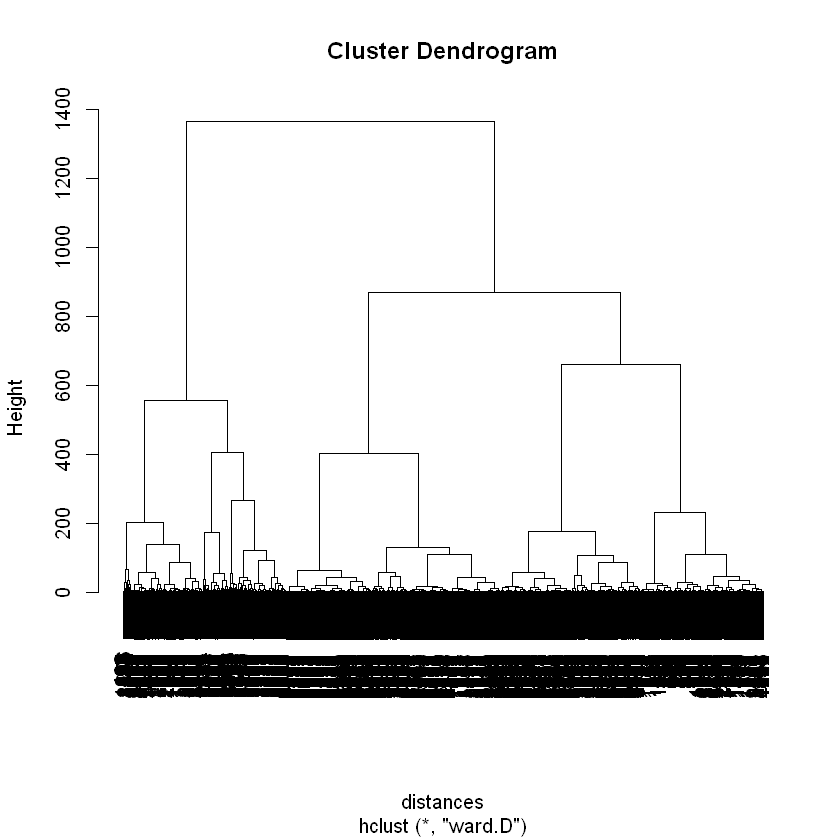

In [7]:
plot(clusterDistance)

In [8]:
clusterGroups = cutree(clusterDistance, k=5)

In [10]:
table(clusterGroups)

clusterGroups
   1    2    3    4    5 
 776  519  494  868 1342 

Now, use tapply to compare the average values in each of the variables for the 5 clusters (the centroids of the clusters). You may want to compute the average values of the unnormalized data so that it is easier to interpret. You can do this for the variable "Balance" with the following command:
```R
tapply(airlines$Balance, clusterGroups, mean)
```

In [11]:
tapply(airlines$Balance, clusterGroups, mean)

1         2         3         4         5 
 57866.90 110669.27 198191.57  52335.91  36255.91

In [13]:
tapply(airlines$QualMiles, clusterGroups, mean)

1            2            3            4            5 
   0.6443299 1065.9826590   30.3461538    4.8479263    2.5111773

In [14]:
tapply(airlines$BonusMiles, clusterGroups, mean)

1         2         3         4         5 
10360.124 22881.763 55795.860 20788.766  2264.788

In [15]:
tapply(airlines$BonusTrans, clusterGroups, mean)

1         2         3         4         5 
10.823454 18.229287 19.663968 17.087558  2.973174

In [16]:
tapply(airlines$FlightMiles, clusterGroups, mean)

1          2          3          4          5 
  83.18428 2613.41811  327.67611  111.57373  119.32191

In [17]:
tapply(airlines$FlightTrans, clusterGroups, mean)

1         2         3         4         5 
0.3028351 7.4026975 1.0688259 0.3444700 0.4388972

In [18]:
tapply(airlines$DaysSinceEnroll, clusterGroups, mean)

1        2        3        4        5 
6235.365 4402.414 5615.709 2840.823 3060.081

### K-Means Clustering

In [19]:
RNGkind(sample.kind = "Rounding")
set.seed(88)
KMC = kmeans(airlinesNorm, centers = 5, iter.max = 1000)

Warning message in RNGkind(sample.kind = "Rounding"):
"non-uniform 'Rounding' sampler used"


In [20]:
table(KMC$cluster)


   1    2    3    4    5 
 408  141  993 1182 1275 

In [21]:
table(clusterGroups, KMC$cluster)

             
clusterGroups    1    2    3    4    5
            1    4    0   98  673    1
            2   92  137  105   92   93
            3  300    4  132   58    0
            4   12    0  653   30  173
            5    0    0    5  329 1008